In [1]:
# Language modelling



In [2]:
!pip install nltk

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import Counter
from torch.utils.data import DataLoader, Dataset
import nltk
from nltk.tokenize import word_tokenize


In [4]:
document = """About the Program
What is the course fee for  Data Science Mentorship Program (DSMP 2023)
The course follows a monthly subscription model where you have to make monthly payments of Rs 799/month.
What is the total duration of the course?
The total duration of the course is 7 months. So the total course fee becomes 799*7 = Rs 5600(approx.)
What is the syllabus of the mentorship program?
We will be covering the following modules:
Python Fundamentals
Python libraries for Data Science
Data Analysis
SQL for Data Science
Maths for Machine Learning
ML Algorithms
Practical ML
MLOPs
Case studies
You can check the detailed syllabus here - https://learnwith.campusx.in/courses/CampusX-Data-Science-Mentorship-Program-637339afe4b0615a1bbed390
Will Deep Learning and NLP be a part of this program?
No, NLP and Deep Learning both are not a part of this program’s curriculum.
What if I miss a live session? Will I get a recording of the session?
Yes all our sessions are recorded, so even if you miss a session you can go back and watch the recording.
Where can I find the class schedule?
Checkout this google sheet to see month by month time table of the course - https://docs.google.com/spreadsheets/d/16OoTax_A6ORAeCg4emgexhqqPv3noQPYKU7RJ6ArOzk/edit?usp=sharing.
What is the time duration of all the live sessions?
Roughly, all the sessions last 2 hours.
What is the language spoken by the instructor during the sessions?
Hinglish
How will I be informed about the upcoming class?
You will get a mail from our side before every paid session once you become a paid user.
Can I do this course if I am from a non-tech background?
Yes, absolutely.
I am late, can I join the program in the middle?
Absolutely, you can join the program anytime.
If I join/pay in the middle, will I be able to see all the past lectures?
Yes, once you make the payment you will be able to see all the past content in your dashboard.
Where do I have to submit the task?
You don’t have to submit the task. We will provide you with the solutions, you have to self evaluate the task yourself.
Will we do case studies in the program?
Yes.
Where can we contact you?
You can mail us at nitish.campusx@gmail.com
Payment/Registration related questions
Where do we have to make our payments? Your YouTube channel or website?
You have to make all your monthly payments on our website. Here is the link for our website - https://learnwith.campusx.in/
Can we pay the entire amount of Rs 5600 all at once?
Unfortunately no, the program follows a monthly subscription model.
What is the validity of monthly subscription? Suppose if I pay on 15th Jan, then do I have to pay again on 1st Feb or 15th Feb
15th Feb. The validity period is 30 days from the day you make the payment. So essentially you can join anytime you don’t have to wait for a month to end.
What if I don’t like the course after making the payment. What is the refund policy?
You get a 7 days refund period from the day you have made the payment.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmail.com
Post registration queries
Till when can I view the paid videos on the website?
This one is tricky, so read carefully. You can watch the videos till your subscription is valid. Suppose you have purchased subscription on 21st Jan, you will be able to watch all the past paid sessions in the period of 21st Jan to 20th Feb. But after 21st Feb you will have to purchase the subscription again.
But once the course is over and you have paid us Rs 5600(or 7 installments of Rs 799) you will be able to watch the paid sessions till Aug 2024.
Why lifetime validity is not provided?
Because of the low course fee.
Where can I reach out in case of a doubt after the session?
You will have to fill a google form provided in your dashboard and our team will contact you for a 1 on 1 doubt clearance session
If I join the program late, can I still ask past week doubts?
Yes, just select past week doubt in the doubt clearance google form.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmai.com
Certificate and Placement Assistance related queries
What is the criteria to get the certificate?
There are 2 criterias:
You have to pay the entire fee of Rs 5600
You have to attempt all the course assessments.
I am joining late. How can I pay payment of the earlier months?
You will get a link to pay fee of earlier months in your dashboard once you pay for the current month.
I have read that Placement assistance is a part of this program. What comes under Placement assistance?
This is to clarify that Placement assistance does not mean Placement guarantee. So we dont guarantee you any jobs or for that matter even interview calls. So if you are planning to join this course just for placements, I am afraid you will be disappointed. Here is what comes under placement assistance
Portfolio Building sessions
Soft skill sessions
Sessions with industry mentors
Discussion on Job hunting strategies
"""


In [5]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
# tokenize
tokens=word_tokenize(document.lower())

In [7]:
vocab={'<unk>':0}

for token in Counter(tokens).keys():
  if token not in vocab:
    vocab[token]=len(vocab)

vocab


{'<unk>': 0,
 'about': 1,
 'the': 2,
 'program': 3,
 'what': 4,
 'is': 5,
 'course': 6,
 'fee': 7,
 'for': 8,
 'data': 9,
 'science': 10,
 'mentorship': 11,
 '(': 12,
 'dsmp': 13,
 '2023': 14,
 ')': 15,
 'follows': 16,
 'a': 17,
 'monthly': 18,
 'subscription': 19,
 'model': 20,
 'where': 21,
 'you': 22,
 'have': 23,
 'to': 24,
 'make': 25,
 'payments': 26,
 'of': 27,
 'rs': 28,
 '799/month': 29,
 '.': 30,
 'total': 31,
 'duration': 32,
 '?': 33,
 '7': 34,
 'months': 35,
 'so': 36,
 'becomes': 37,
 '799': 38,
 '*': 39,
 '=': 40,
 '5600': 41,
 'approx': 42,
 'syllabus': 43,
 'we': 44,
 'will': 45,
 'be': 46,
 'covering': 47,
 'following': 48,
 'modules': 49,
 ':': 50,
 'python': 51,
 'fundamentals': 52,
 'libraries': 53,
 'analysis': 54,
 'sql': 55,
 'maths': 56,
 'machine': 57,
 'learning': 58,
 'ml': 59,
 'algorithms': 60,
 'practical': 61,
 'mlops': 62,
 'case': 63,
 'studies': 64,
 'can': 65,
 'check': 66,
 'detailed': 67,
 'here': 68,
 '-': 69,
 'https': 70,
 '//learnwith.campusx.i

In [8]:
len(vocab)

289

In [9]:
# extract sentences from data
input_sentences=document.split('\n')


In [10]:
def text_to_indices(sent,vocab):
  indices=[]
  for token in sent:
    if token in vocab:
      indices.append(vocab[token])
    else:
      indices.append(vocab['<unk>'])
  return indices

In [11]:
input_numeric_sent=[]
for sent in input_sentences:
  input_numeric_sent.append(text_to_indices(word_tokenize(sent.lower()),vocab))



In [12]:
input_numeric_sent

[[1, 2, 3],
 [4, 5, 2, 6, 7, 8, 9, 10, 11, 3, 12, 13, 14, 15],
 [2, 6, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 18, 26, 27, 28, 29, 30],
 [4, 5, 2, 31, 32, 27, 2, 6, 33],
 [2,
  31,
  32,
  27,
  2,
  6,
  5,
  34,
  35,
  30,
  36,
  2,
  31,
  6,
  7,
  37,
  38,
  39,
  34,
  40,
  28,
  41,
  12,
  42,
  30,
  15],
 [4, 5, 2, 43, 27, 2, 11, 3, 33],
 [44, 45, 46, 47, 2, 48, 49, 50],
 [51, 52],
 [51, 53, 8, 9, 10],
 [9, 54],
 [55, 8, 9, 10],
 [56, 8, 57, 58],
 [59, 60],
 [61, 59],
 [62],
 [63, 64],
 [22, 65, 66, 2, 67, 43, 68, 69, 70, 50, 71],
 [45, 72, 58, 73, 74, 46, 17, 75, 27, 76, 3, 33],
 [77, 78, 74, 73, 72, 58, 79, 80, 81, 17, 75, 27, 76, 3, 82, 83, 84, 30],
 [4, 85, 86, 87, 17, 88, 89, 33, 45, 86, 90, 17, 91, 27, 2, 89, 33],
 [92,
  93,
  94,
  95,
  80,
  96,
  78,
  36,
  97,
  85,
  22,
  87,
  17,
  89,
  22,
  65,
  98,
  99,
  73,
  100,
  2,
  91,
  30],
 [21, 65, 86, 101, 2, 102, 103, 33],
 [104,
  76,
  105,
  106,
  24,
  107,
  108,
  109,
  108,
  110,
  111,
  27,

In [13]:
training_sequence=[]
for sent in input_numeric_sent:
  for i in range(1,len(sent)):
    training_sequence.append(sent[:i+1])



In [14]:
len_list=[]

for seq in training_sequence:
  len_list.append(len(seq))

max(len_list)

62

In [15]:
padded_training_sequence=[]
for seq in training_sequence:
  padded_training_sequence.append([0]*(max(len_list)-len(seq))+seq)

In [16]:
padded_training_sequence=torch.tensor(padded_training_sequence,dtype=torch.long)

In [17]:
X=padded_training_sequence[:,:-1]
y=padded_training_sequence[:,-1]

In [18]:
class CustomDataset(Dataset):

  def __init__(self,X,y):
    #super().__init__()
    self.X=X
    self.y=y

  def __len__(self):
    return len(self.X)

  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]



In [19]:
dataset=CustomDataset(X,y)

In [20]:
dataset[0]

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
 tensor(2))

In [21]:
dataloader=DataLoader(dataset,batch_size=32,shuffle=True)

In [22]:
for input,output in dataloader:
  print(input,output)

tensor([[  0,   0,   0,  ...,  22, 158,   2],
        [  0,   0,   0,  ..., 251,  73, 252],
        [  0,   0,   0,  ...,  33, 151, 172],
        ...,
        [  0,   0,   0,  ..., 108, 110, 111],
        [  0,   0,   0,  ..., 192,  27, 223],
        [  0,   0,   0,  ...,  34, 228,  27]]) tensor([159, 253, 173, 177,  17, 188,  50,  18,  23, 259,  16,  36, 220, 129,
        209, 179,   6, 153,  17,  36,  46,  30,   2,  24,  27,   6,  95, 244,
          2,  27, 186,  28])
tensor([[  0,   0,   0,  ...,  78,  65,  86],
        [  0,   0,   0,  ..., 127,   2, 195],
        [  0,   0,   0,  ...,   0,   0,   4],
        ...,
        [  0,   0,   0,  ..., 231, 232, 183],
        [  0,   0,   0,  ...,  75,  27,  76],
        [  0,   0,   0,  ..., 176, 286, 287]]) tensor([141,  22,   5, 240, 240,   2, 141, 273, 168, 156,  76, 146, 145, 101,
         23,  38,  50, 135,  30,  26,  24,  50,  90, 185,  86,   2,   3, 253,
        223,   5,   3, 288])
tensor([[  0,   0,   0,  ...,   0,   0,  85],
    

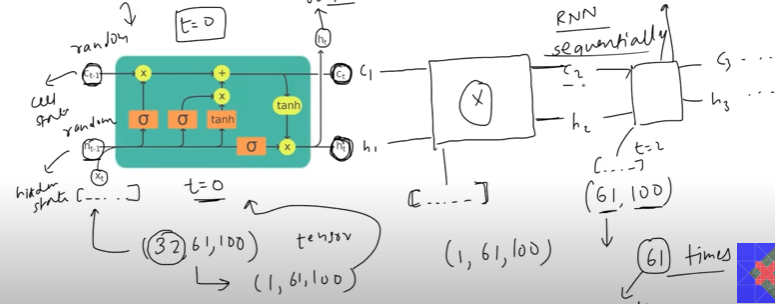

As batch size is 32,all 32 sentences are processed parallely,at t=0,all 32 gives out c1,...

In [29]:
class LSTMModel(nn.Module):

  def __init__(self,vocab_size):
    super().__init__()
    self.embedding=nn.Embedding(vocab_size,100)
    self.lstm=nn.LSTM(100,150,batch_first=True)
    self.fc=nn.Linear(150,vocab_size)

  def forward(self,x):
    embeded=self.embedding(x)
    inter_hid_states,(final_hid_state,final_cell_state)=self.lstm(embeded)
    output=self.fc(final_hid_state.squeeze(0))
    return output





In [30]:
model=LSTMModel(len(vocab))

In [31]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [32]:
model.to(device)

LSTMModel(
  (embedding): Embedding(289, 100)
  (lstm): LSTM(100, 150, batch_first=True)
  (fc): Linear(in_features=150, out_features=289, bias=True)
)

In [33]:
epochs=50
learning_rate=0.001

criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [34]:
#traning loop

for epoch in range(epochs):
  total_loss=0

  for batch_x,batch_y in dataloader:

    batch_x=batch_x.to(device)
    batch_y=batch_y.to(device)

    optimizer.zero_grad()

    output=model(batch_x)

    loss=criterion(output,batch_y)

    loss.backward()

    optimizer.step()

    total_loss+=loss.item()

  print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss}")



Epoch 1/50, Loss: 164.64805269241333
Epoch 2/50, Loss: 145.8129415512085
Epoch 3/50, Loss: 133.115149974823
Epoch 4/50, Loss: 119.87163853645325
Epoch 5/50, Loss: 107.81734800338745
Epoch 6/50, Loss: 96.48231649398804
Epoch 7/50, Loss: 86.30252957344055
Epoch 8/50, Loss: 76.65922474861145
Epoch 9/50, Loss: 68.59196269512177
Epoch 10/50, Loss: 60.6390084028244
Epoch 11/50, Loss: 53.60447323322296
Epoch 12/50, Loss: 47.86193084716797
Epoch 13/50, Loss: 42.30201458930969
Epoch 14/50, Loss: 37.13391947746277
Epoch 15/50, Loss: 32.4170480966568
Epoch 16/50, Loss: 28.5561380982399
Epoch 17/50, Loss: 25.20943719148636
Epoch 18/50, Loss: 22.211475729942322
Epoch 19/50, Loss: 20.170470029115677
Epoch 20/50, Loss: 17.712270885705948
Epoch 21/50, Loss: 16.118551164865494
Epoch 22/50, Loss: 14.58033475279808
Epoch 23/50, Loss: 13.206585079431534
Epoch 24/50, Loss: 12.305162519216537
Epoch 25/50, Loss: 11.266162753105164
Epoch 26/50, Loss: 10.24934521317482
Epoch 27/50, Loss: 9.602873280644417
Epoc

In [ ]:
model.eval()

In [37]:
#text-query
def prediction(model,vocab,text):

  tokenized_text=word_tokenize(text.lower())
  print(tokenized_text)

  # text to numerical indices
  numerical_indices=text_to_indices(tokenized_text,vocab)
  print(numerical_indices)

  # applying padding
  if len(numerical_indices)<61:
    padded_text=torch.tensor([0]*(61-len(numerical_indices))+numerical_indices,dtype=torch.long).unsqueeze(0)

  #send to model
  output=model(padded_text)
  print(output)

  # predicted word index
  value,index=torch.max(output,dim=1)

  # merge with text
  return text+" "+list(vocab.keys())[index]


In [38]:
prediction(model,vocab,"The course follows a monthly")

['the', 'course', 'follows', 'a', 'monthly']
[2, 6, 16, 17, 18]
tensor([[-2.0366e+00,  5.5820e-01, -2.3414e+00, -2.7457e+00, -1.9776e+00,
          6.2981e-01,  7.2701e-01,  2.7573e+00,  2.7820e+00, -1.1289e+00,
         -2.5458e+00, -5.2957e-01, -3.1493e+00, -2.9562e+00, -3.9052e+00,
         -3.3750e+00,  1.1892e+00,  8.5976e-01,  5.4007e+00,  1.0133e+01,
          4.9480e+00,  1.6855e+00,  1.4462e+00,  1.1780e+00,  3.2627e+00,
         -3.7690e-01,  3.4660e+00,  2.9218e+00, -3.4172e+00, -1.7027e+00,
          1.9890e+00, -4.8783e-01,  1.1105e+00, -1.9080e-01,  2.5889e+00,
          1.0426e-01, -3.3482e-01,  7.1407e-01, -2.2381e+00, -8.5835e-01,
         -1.0168e+00, -1.1896e+00, -2.1144e+00,  4.2532e-01, -1.4358e+00,
         -4.4873e-01, -4.1708e+00, -5.3988e-01, -7.4250e-01, -6.4961e-01,
          6.1918e-01, -4.2483e+00, -2.1026e+00, -1.3149e+00, -3.2846e+00,
         -4.5306e+00, -4.0072e+00, -1.9934e+00, -1.4599e+00, -2.0255e-01,
         -1.5871e+00, -4.6103e+00, -4.5916e+00, 

'The course follows a monthly subscription'